### Advanced Statistical Analysis Presentetion

#### Covid_19 Vaccines Analysis Based on different ages

##### Alireza Moll Ali Hosseini  ID: 2015707
##### Dyutideepta Banerjee ID: 2005645

### Explanation of the procedure:

There are Two different groups(vaccine and placebo) that may receive vaccine or placebo respectively.
then the Vaccine Efficacy is estimated by the following formula:

\begin{align}
Vaccine Efficacy = 100 * (1 - IRR)
\end{align}

Where IRR is Incedence Rate Ratio given by the following fomula:

\begin{align}
IRR = Vaccince Incedence Ratio / Placebo Incedence Ratio
\end{align}

where Vaccine Incedence Ratio is the ratio of confirmed cases of Covid-19 illness per number of people in vaccine group.(same for the Placebo Incedence Ratio)

Therefore with the published data by the vaccines' componies we can plot the prior and posterior distributions of the vacciene and placebo incedence rate and then by using monte carlo method(probabilities that the vaccine incidence rate is less than the less than the placebo incedence rate), find the Efficacy of the vaccines.

(we were used 2 different prior distributon in our analysis: 
1. beta distribution given the fact that infection rate of covid-19 is 1 persent.
2. beta distribution given the fact that infection rate among elder people is more than 1 percent.)

In [57]:
### Bayesian Inference of a given Data

# pfizer(overall)
vaccine.total <- 17411
placebo.total <- 17511
vaccine.pos <- 8
placebo.pos <- 162
p <- seq(0,1,len=200001)

prior <- dbeta(x=p,shape1=0.010101,shape2=1)
vaccine.rate <- dbeta(x=p,shape1=0.010101+vaccine.pos,shape2=1+vaccine.total-vaccine.pos)
placebo.rate <- dbeta(x=p,shape1=0.010101+placebo.pos,shape2=1+placebo.total-placebo.pos)

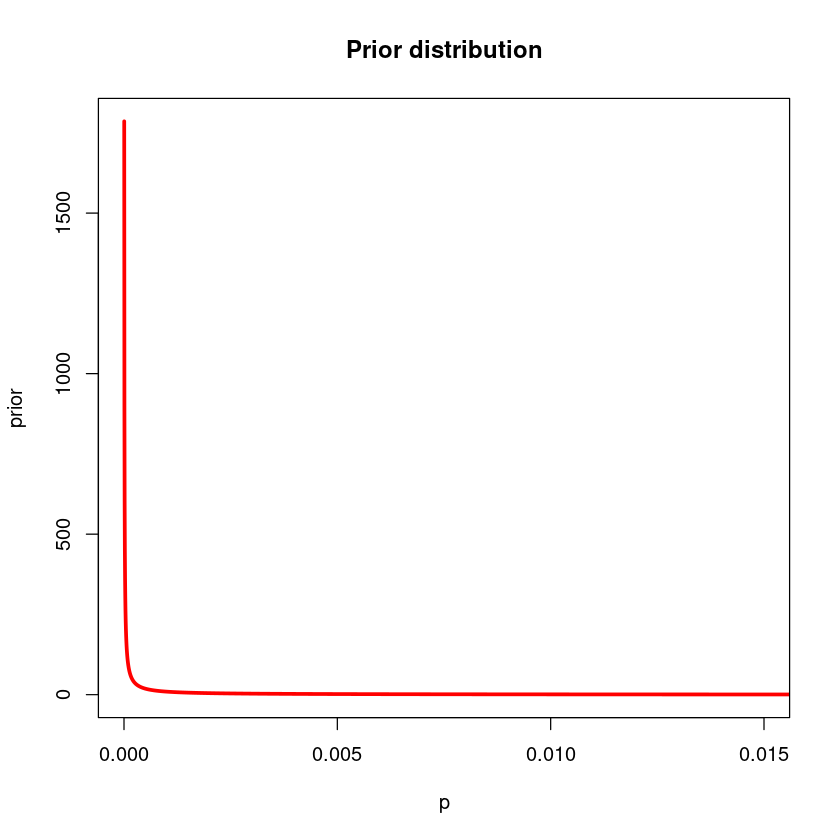

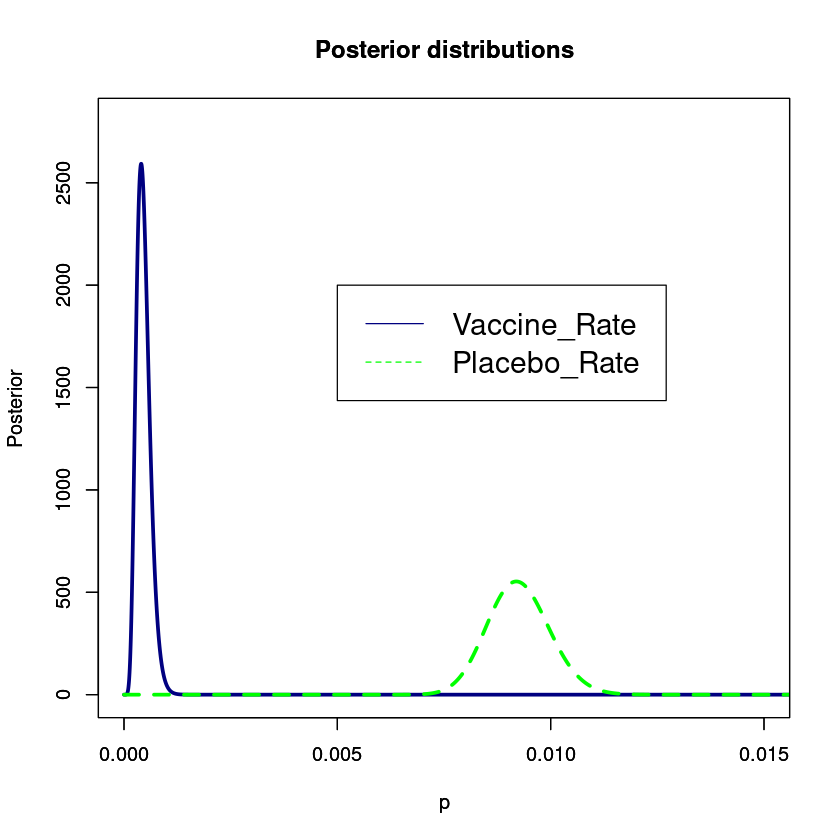

In [58]:
plot(p,prior,type='l',lwd=3,col='red',xlim=range(0,0.015),main='Prior distribution')
plot(p,vaccine.rate,type='l',lwd=3,col='navy',xlim=range(0,0.015),ylim=range(0,2800),
     ylab='Posterior',main='Posterior distributions')
par(new=TRUE)
plot(p,placebo.rate,type='l',lwd=3,col='green',xlim=range(0,0.015),ylim=range(0,2800),
     lty=2,ylab='Posterior',main='Posterior distributions')
legend(0.005,2000,c('Vaccine_Rate','Placebo_Rate'), col=c('navy','green'),lty=1:2,cex=1.5)

### These posterior distribution plots clearly shows that the distribution of Vaccine incedene rate is much lower than the one for Placebo incedence rate. This means that it is extremely unlikely that we get those result by chance.

### We tried to compute the Efficacy of the Vaccines with JAGS and infer the 95% ceredibility interval of the cilinical trials performed for each vaccine.(based on differen age categories)

### Pfizer

In [59]:
### Table of real Data

tot_vaccine <- c(17411,13549,3848,3074,774)
tot_placebo <- c(17511,13618,3880,3095,785)
pos_vaccine <- c(8,7,1,1,0)
pos_placebo <- c(162,143,19,14,5)
pfizer.tb <- tibble::tibble(total.vaccienes = tot_vaccine, total.placebo=tot_placebo,
                            positive.vaccines = pos_vaccine, positive.placebo = pos_placebo,
                            age = c('overall','less than 65','more than 65','between 65 and 74','more than 75'),
                            efficacy = c(95.0,95.1,94.7,92.9,100.0),
                            CI = c('(90.0,97.9)','(89.6,98.1)','(66.7,99.9)','(53.1,99.8)','(-13.1,100)'))
(pfizer.tb)

total.vaccienes,total.placebo,positive.vaccines,positive.placebo,age,efficacy,CI
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
17411,17511,8,162,overall,95.0,"(90.0,97.9)"
13549,13618,7,143,less than 65,95.1,"(89.6,98.1)"
3848,3880,1,19,more than 65,94.7,"(66.7,99.9)"
3074,3095,1,14,between 65 and 74,92.9,"(53.1,99.8)"
774,785,0,5,more than 75,100.0,"(-13.1,100)"


In [60]:
### Table of our analysis

age <- c('overall','less than 65','more than 65','between 65 and 74','more than 75')
efficacy <- c(95.59,95.81,94.74,93.29,100)
CI <- c('(91.43,98.22)','(91.22,98.36)','(73.49,99.86)','(63.97,99.84)','(99.92,100)')
new.pfizer.tb <- tibble::tibble(age,efficacy,CI)
new.pfizer.tb

age,efficacy,CI
<chr>,<dbl>,<chr>
overall,95.59,"(91.43,98.22)"
less than 65,95.81,"(91.22,98.36)"
more than 65,94.74,"(73.49,99.86)"
between 65 and 74,93.29,"(63.97,99.84)"
more than 75,100.00,"(99.92,100)"


### Moderna

In [61]:
### Table of real Data

tot_vaccine <- c(14134,10551,3583,2953,630)
tot_placebo <- c(14073,10521,3552,2864,688)
pos_vaccine <- c(11,7,4,4,0)
pos_placebo <- c(185,156,29,22,7)
moderna.tb <- tibble::tibble(total.vaccienes = tot_vaccine, total.placebo=tot_placebo,
                            positive.vaccines = pos_vaccine, positive.placebo = pos_placebo,
                            age = c('overall','less than 65','more than 65','between 65 and 74','more than 75'),
                            efficacy = c(94.1,95.6,86.4,82.4,100.0),
                            CI = c('(89.3,96.8)','(90.6,97.9)','(61.04,95.2)','(48.9,93.9)','(NE,100)'))
(moderna.tb)

total.vaccienes,total.placebo,positive.vaccines,positive.placebo,age,efficacy,CI
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
14134,14073,11,185,overall,94.1,"(89.3,96.8)"
10551,10521,7,156,less than 65,95.6,"(90.6,97.9)"
3583,3552,4,29,more than 65,86.4,"(61.04,95.2)"
2953,2864,4,22,between 65 and 74,82.4,"(48.9,93.9)"
630,688,0,7,more than 75,100.0,"(NE,100)"


In [62]:
### Table of our analysis

age <- c('overall','less than 65','more than 65','between 65 and 74','more than 75')
efficacy <- c(94.73,95.95,86.40,84.03,100)
CI <- c('(90.29,97.34)','(91.99,98.5)','(65.85,96.16)','(56.41,95.84)','(99.94,100)')
new.moderna.tb <- tibble::tibble(age,efficacy,CI)
new.moderna.tb

age,efficacy,CI
<chr>,<dbl>,<chr>
overall,94.73,"(90.29,97.34)"
less than 65,95.95,"(91.99,98.5)"
more than 65,86.40,"(65.85,96.16)"
between 65 and 74,84.03,"(56.41,95.84)"
more than 75,100.00,"(99.94,100)"


### Astrazeneca

In [63]:
### Table of real Data

tot_vaccine <- 5258
tot_placebo <- 5210
pos_vaccine <- 64
pos_placebo <- 154
astrazeneca.tb <- tibble::tibble(total.vaccienes = tot_vaccine, total.placebo=tot_placebo,
                            positive.vaccines = pos_vaccine, positive.placebo = pos_placebo,
                            age = 'overall',
                            efficacy = 59.5,
                            CI = '(45.8,69.7)')
(astrazeneca.tb)

total.vaccienes,total.placebo,positive.vaccines,positive.placebo,age,efficacy,CI
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
5258,5210,64,154,overall,59.5,"(45.8,69.7)"


In [64]:
### Table of our analysis

age <- 'overall'
efficacy <- 60.33
CI <- '(46.53,70.35)'
new.astrazeneca.tb <- tibble::tibble(age,efficacy,CI)
new.astrazeneca.tb

age,efficacy,CI
<chr>,<dbl>,<chr>
overall,60.33,"(46.53,70.35)"


### Janssen

In [65]:
### Table of real Data

tot_vaccine <- c(19630,12830,6800)
tot_placebo <- c(19691,12881,6810)
pos_vaccine <- c(116,95,21)
pos_placebo <- c(348,260,88)
janssen.tb <- tibble::tibble(total.vaccienes = tot_vaccine, total.placebo=tot_placebo,
                            positive.vaccines = pos_vaccine, positive.placebo = pos_placebo,
                            age = c('overall','less than 60','more than 60'),
                            efficacy = c(66.9,63.7,76.3),
                            CI = c('(59.0,73.4)','(53.9,71.6)','(61.6,86.0)'))
(janssen.tb)

total.vaccienes,total.placebo,positive.vaccines,positive.placebo,age,efficacy,CI
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
19630,19691,116,348,overall,66.9,"(59.0,73.4)"
12830,12881,95,260,less than 60,63.7,"(53.9,71.6)"
6800,6810,21,88,more than 60,76.3,"(61.6,86.0)"


In [66]:
### Table of our analysis

age <- c('overall','less than 60','more than 60')
efficacy <- c(66.93,63.97,78.85)
CI <- c('(59.45,73.42)','(54.34,71.43)','(64.26,86.77)')
new.janssen.tb <- tibble::tibble(age,efficacy,CI)
new.janssen.tb

age,efficacy,CI
<chr>,<dbl>,<chr>
overall,66.93,"(59.45,73.42)"
less than 60,63.97,"(54.34,71.43)"
more than 60,78.85,"(64.26,86.77)"
